In [ ]:
!rm -r /content/sample_data/
!rm -r /content/resources /content/data

rm: cannot remove '/content/resources': No such file or directory
rm: cannot remove '/content/data': No such file or directory


# Fetch WIDER FACE nad MAFA datasets

In [ ]:
import os

In [ ]:
os.makedirs("/content/data/train/face")
os.makedirs("/content/data/train/masked_face")
os.makedirs("/content/data/valid/face")
os.makedirs("/content/data/valid/masked_face")
os.makedirs("/content/data/test/face")
os.makedirs("/content/data/test/masked_face")
os.mkdir("/content/resources")
%cd resources/

!gdown https://drive.google.com/u/0/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M&export=download
!gdown https://drive.google.com/u/0/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q&export=download
!wget http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip

!unzip -qx WIDER_train.zip
!unzip -qx WIDER_val.zip
!unzip -qx wider_face_split.zip

!gdown --folder https://drive.google.com/drive/folders/1nbtM1n0--iZ3VVbNGhocxbnBGhMau_OG

%cd MAFA/
!unzip -qx train-images.zip
!unzip -qx MAFA-Label-Train.zip
!rm *.zip
%cd ..

!rm *.zip
%cd ..

/content/resources
Downloading...
From: https://drive.google.com/u/0/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M
To: /content/resources/WIDER_train.zip
100% 1.47G/1.47G [00:16<00:00, 88.6MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q
To: /content/resources/WIDER_val.zip
100% 363M/363M [00:04<00:00, 76.5MB/s]
--2023-05-26 07:10:27--  http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip
Resolving shuoyang1213.me (shuoyang1213.me)... 192.30.252.153, 192.30.252.154
Connecting to shuoyang1213.me (shuoyang1213.me)|192.30.252.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘wider_face_split.zip’

wider_face_split.zi 100%[===================>]   3.42M  7.58MB/s    in 0.5s    

2023-05-26 07:10:27 (7.58 MB/s) - ‘wider_face_split.zip’ saved [3591642/3591642]

Retrieving folder list
Processing file 1uN0a4P0wAFwJLid_r7VHFs0KUcizIRGN MAFA-Label-Test.zip
Proce

# Prepare Train and Validation datasets

In [ ]:
WIDER_FACE_ANNOT_TRAIN_DIR = '/content/resources/wider_face_split/wider_face_train_bbx_gt.txt'
WIDER_FACE_PHOTOS_INPUT_TRAIN_DIR = '/content/resources/WIDER_train/images/'
WIDER_FACE_PHOTOS_OUTPUT_TRAIN_DIR = '/content/data/train/'

WIDER_FACE_ANNOT_VAL_DIR = '/content/resources/wider_face_split/wider_face_val_bbx_gt.txt'
WIDER_FACE_PHOTOS_INPUT_VAL_DIR = '/content/resources/WIDER_val/images/'
WIDER_FACE_PHOTOS_OUTPUT_VAL_DIR = '/content/data/valid/'

In [ ]:
from PIL import Image
from tqdm.notebook import tqdm

In [ ]:
def process_data(input_annotation_file, input_images_dir, output_images_dir):
  annots = open(input_annotation_file) 
  lines = annots.readlines()
  names =   [x for x in lines if 'jpg' in x]
  indices = [lines.index(x) for x in names]

  for n in tqdm(range(len(names[:]))):
      i = indices[n]
      name = lines[i].rstrip()
      old_img_path = os.path.join(input_images_dir, name)
      name = name.split('/')[-1]
      
      num_objs = int(lines[i+1].rstrip())
      bboxs = lines[i+2 : i+2+num_objs]
      bboxs = list(map(lambda x:x.split(), bboxs))
      
      for bbx in bboxs:
          x = int(bbx[0])
          y = int(bbx[1])
          w = int(bbx[2])
          h = int(bbx[3])
      
          if w > 100 and h/w < 1.35 and h/w > 0.9:
            c = int(bbx[8])
 
            if c == 0:
              sub = 'face'
            else:
              sub = 'masked_face'

            img = Image.open(old_img_path)
            cropped_img = img.crop((x, y, x+w, y+h))
              
            img_path = os.path.join(output_images_dir, sub, str(i) + '_' + name) 

            cropped_img.save(img_path)

In [ ]:
process_data(WIDER_FACE_ANNOT_TRAIN_DIR, WIDER_FACE_PHOTOS_INPUT_TRAIN_DIR, WIDER_FACE_PHOTOS_OUTPUT_TRAIN_DIR)
process_data(WIDER_FACE_ANNOT_VAL_DIR, WIDER_FACE_PHOTOS_INPUT_VAL_DIR, WIDER_FACE_PHOTOS_OUTPUT_VAL_DIR)

  0%|          | 0/12880 [00:00<?, ?it/s]

  0%|          | 0/3226 [00:00<?, ?it/s]

In [ ]:
def plot_photo_count(face_dir, masked_face_dir, title):

  face_count = len([file for file in os.listdir(face_dir) if file.endswith(".jpg") or file.endswith(".jpg")])
  masked_face_count = len([file for file in os.listdir(masked_face_dir) if file.endswith(".jpg") or file.endswith(".jpg")])

  directories = ['face_dir', 'masked_face_dir']
  counts = [face_count, masked_face_count]

  plt.bar(directories, counts)
  plt.xlabel('Directories')
  plt.ylabel('Number of Photos')
  plt.title('Number of Photos in {}'.format(title))
  plt.show()


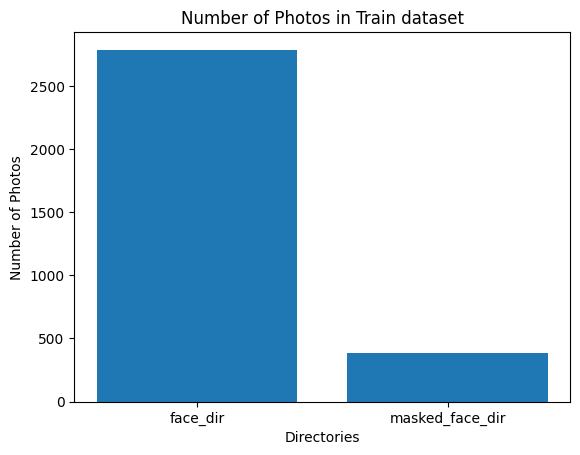

In [ ]:
plot_photo_count("/content/data/train/face", "/content/data/train/masked_face", "Train dataset")

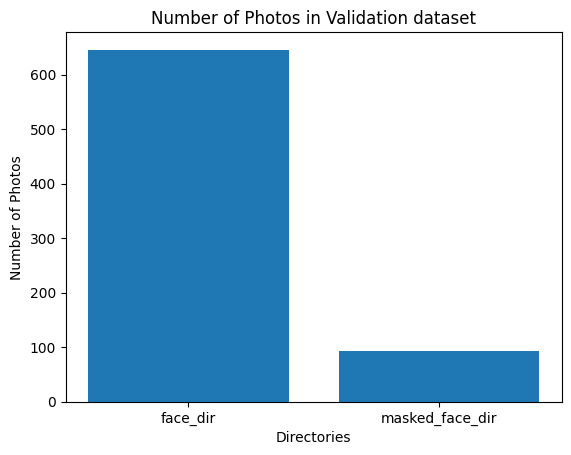

In [ ]:
plot_photo_count("/content/data/valid/face", "/content/data/valid/masked_face", "Validation dataset")

# Original and processed data comparison

In [ ]:
import cv2
from matplotlib import pyplot as plt

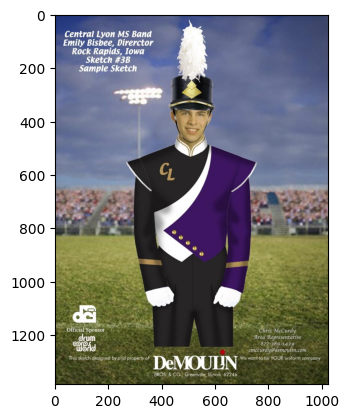

In [ ]:
img_array = cv2.imread('/content/resources/WIDER_train/images/0--Parade/0_Parade_marchingband_1_849.jpg')
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_array, cmap='gray')

In [ ]:
img_array.shape

(1385, 1024, 3)

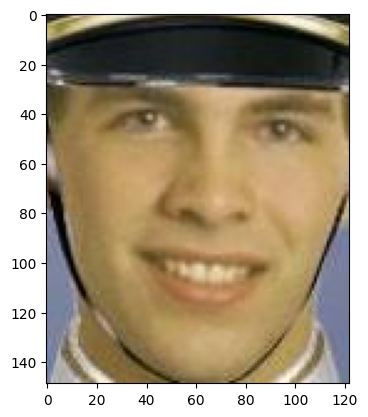

In [ ]:
img_array = cv2.imread('/content/data/train/face/0_0_Parade_marchingband_1_849.jpg')
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_array, cmap='gray')

In [ ]:
img_array.shape

(149, 122, 3)

# Train and Validate data loaders

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_rows, img_cols = 224, 224
batch_size = 64

train_data_dir = '/content/data/train/'
valid_data_dir = '/content/data/valid/'

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='rgb',
					target_size=(img_rows, img_cols),
					batch_size=batch_size,
					class_mode='binary',
					shuffle=True)

valid_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')

valid_generator = valid_datagen.flow_from_directory(
					valid_data_dir,
					color_mode='rgb',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='binary',
					shuffle=True)

Found 3178 images belonging to 2 classes.
Found 738 images belonging to 2 classes.


# Model implementation - MobileNet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

for layer in model.layers:
  layer.trainable = False

model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-4].output #Ignore last 3 layers

In [ ]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output1 = layers.Activation('sigmoid')(final_output) #Values (0-1)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output1)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

# Binary classification - model training

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Recall()])

In [ ]:
early_stopping = callbacks.EarlyStopping(
  min_delta = 0.025,
  patience = 7,
  restore_best_weights=True,
)

nb_train_samples = 3178
nb_valid_samples = 738
epochs=50

history=new_model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples // batch_size,
                epochs=epochs,
                callbacks=[early_stopping],
                validation_data=valid_generator,
                validation_steps=nb_valid_samples // batch_size)

<ipython-input-21-8f805ba95333>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=new_model.fit_generator(


Epoch 1/50
49/49 [==============================] - 54s 886ms/step - loss: 0.3650 - accuracy: 0.8712 - recall: 0.1354 - val_loss: 0.3075 - val_accuracy: 0.8750 - val_recall: 0.2667
Epoch 2/50
49/49 [==============================] - 43s 871ms/step - loss: 0.2914 - accuracy: 0.8918 - recall: 0.2906 - val_loss: 0.2767 - val_accuracy: 0.8906 - val_recall: 0.3261
Epoch 3/50
49/49 [==============================] - 42s 867ms/step - loss: 0.2675 - accuracy: 0.8992 - recall: 0.3508 - val_loss: 0.2541 - val_accuracy: 0.8991 - val_recall: 0.2805
Epoch 4/50
49/49 [==============================] - 44s 891ms/step - loss: 0.2638 - accuracy: 0.9004 - recall: 0.3368 - val_loss: 0.2629 - val_accuracy: 0.8963 - val_recall: 0.2889
Epoch 5/50
49/49 [==============================] - 42s 863ms/step - loss: 0.2562 - accuracy: 0.9040 - recall: 0.3658 - val_loss: 0.2558 - val_accuracy: 0.8835 - val_recall: 0.2444
Epoch 6/50
49/49 [==============================] - 42s 867ms/step - loss: 0.2346 - accuracy: 0

In [ ]:
import pandas as pd

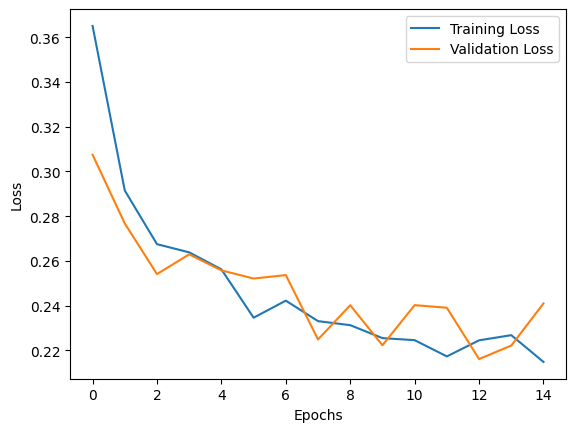

In [ ]:
# Training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

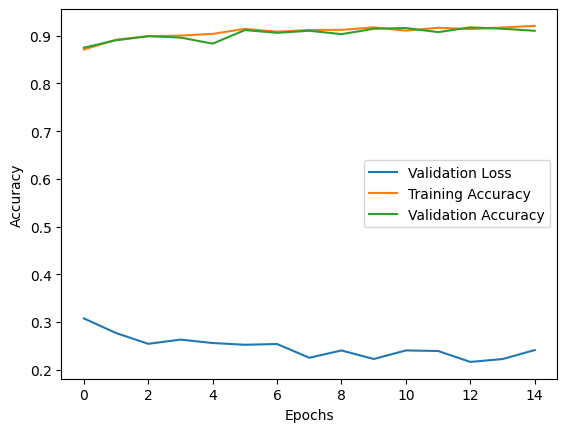

In [ ]:
# Training & validation accuracy
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

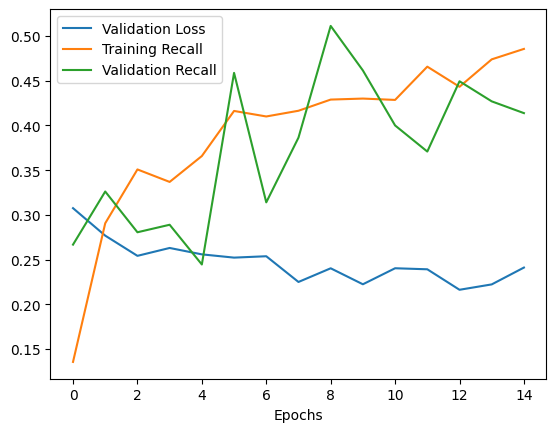

In [ ]:
# Training & validation recall
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
min_val_loss_index = pd.DataFrame(history.history)['val_loss'].idxmin()

val_accuracy = history.history['val_accuracy'][min_val_loss_index]
val_recall = history.history['val_recall'][min_val_loss_index]

print("Minimum validation loss: {}".format(pd.DataFrame(history.history)['val_loss'].min()))
print("Validation accuracy at the minimum validation loss: {}".format(val_accuracy))
print("Validation recall at the minimum validation loss: {}".format(val_recall))


Minimum validation loss: 0.2161424309015274
Validation accuracy at the minimum validation loss: 0.9176136255264282
Validation recall at the minimum validation loss: 0.449438214302063


<ipython-input-25-be5182d89f1a>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = new_model.predict_generator(valid_generator, nb_valid_samples // batch_size+1)


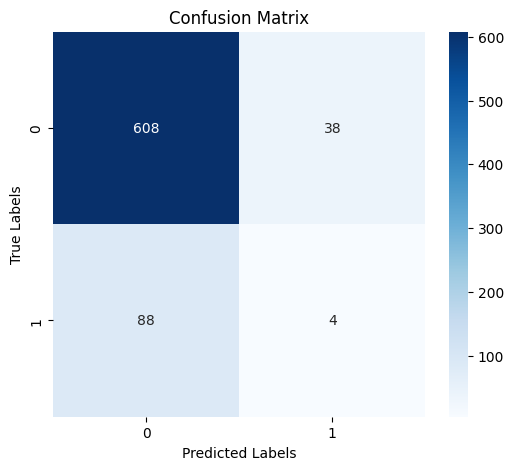

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = new_model.predict_generator(valid_generator, nb_valid_samples // batch_size+1)
y_pred = np.round(predictions).flatten()
y_true = valid_generator.classes

cm = confusion_matrix(y_true, y_pred)
class_labels = ['0', '1']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

In [ ]:
new_model.save("/content/model.h5")

# Preparing test dataset

In [ ]:
# !rm /content/data/test/face/*.jpg /content/data/test/masked_face/*.jpg

In [ ]:
from scipy.io import loadmat

input_annotation_file = '/content/resources/MAFA/LabelTrainAll.mat' 
input_images_dir = '/content/resources/MAFA/images'
output_images_dir = '/content/data/test'

annots = loadmat(input_annotation_file)
data = [(line[1][0], line[2]) for line in annots['label_train'][0]]

imgs = '/content/resources/MAFA/images'

for index in tqdm(range(10000)):
  img = data[index]
  name = img[0]
  old_img_path = os.path.join(input_images_dir, name)

  for row in img[1]:
      x = int(row[1])
      y = int(row[2])
      w = int(row[3])
      h = int(row[4])

      img = Image.open(old_img_path)

      if w > 100 and h/w < 1.35 and h/w > 0.9:
        if row[12] == 3:
          sub = 'face'
        else:
          sub = 'masked_face'

        cropped_img = img.crop((x, y, x+w, y+h))
        img_path = os.path.join(output_images_dir, sub, str(index) + '_' + name) 
        cropped_img.save(img_path)


  0%|          | 0/10000 [00:00<?, ?it/s]

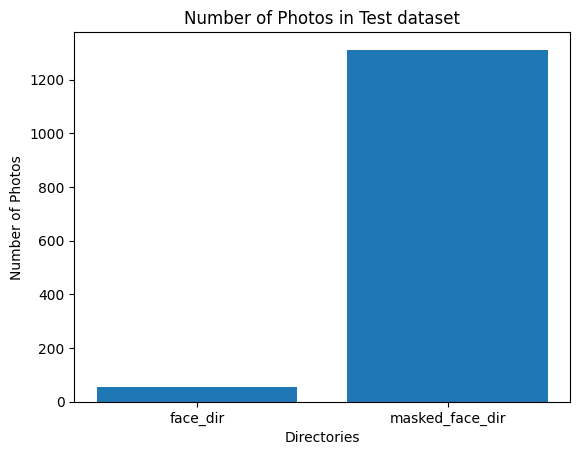

In [ ]:
plot_photo_count("/content/data/test/face", "/content/data/test/masked_face", "Test dataset")

# Test data overview

In [ ]:
import cv2
from matplotlib import pyplot as plt

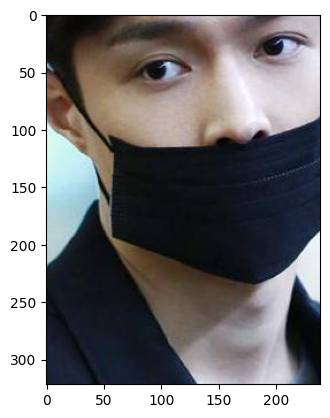

In [ ]:
img_array = cv2.imread('/content/data/test/masked_face/1056_train_00001057.jpg')
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_array, cmap='gray')

In [ ]:
img_array.shape

(322, 239, 3)

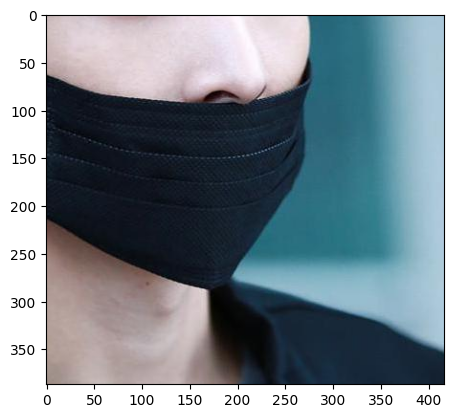

In [ ]:
img_array = cv2.imread('/content/data/test/masked_face/1059_train_00001060.jpg')
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_array, cmap='gray')

In [ ]:
img_array.shape

(387, 417, 3)

# Model - testing

In [ ]:
new_model = tf.keras.models.load_model('/content/model.h5')

In [ ]:
test_dir = '/content/data/test/'
test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

accuracy = new_model.evaluate(test_generator)[1]
print(f"Accuracy on test data: {accuracy}")

Found 1367 images belonging to 2 classes.
22/22 [==============================] - 4s 168ms/step - loss: 0.6992 - accuracy: 0.6130 - recall: 0.6044
Accuracy on test data: 0.613021194934845


Found 1367 images belonging to 2 classes.
22/22 [==============================] - 4s 159ms/step


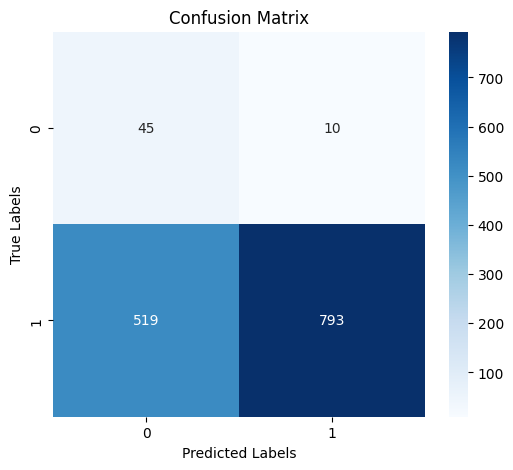

Model Accuracy: 61.30%


In [ ]:
test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

predictions = new_model.predict(test_generator)
predicted_labels = np.round(predictions).flatten()
true_labels = test_generator.classes

confusion_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy = (confusion_mat[0, 0] + confusion_mat[1, 1]) / np.sum(confusion_mat)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Applications - Passport/id photo checker

In [ ]:
new_model = tf.keras.models.load_model('/content/model.h5')

In [ ]:
def check_photo(path):
  img_size=224
  img_array = cv2.imread(path)
  back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  new_array = cv2.resize(back_to_rgb, (img_size, img_size))

  plt.imshow(new_array)


  x_input = np.array(new_array).reshape(1, img_size, img_size, 3)
  x_input = x_input/255.0

  prediction = new_model.predict(x_input)
  prediction = prediction[0][0]

  if prediction <= 0.5:
    print('\nNot covered face.\nPrediction({})'.format(prediction))  
  else:
    print('\nMasked/covered face. \nPrediction({})'.format(prediction))  


1/1 [==============================] - 0s 483ms/step

Masked/covered face. 
Prediction(0.93509840965271)


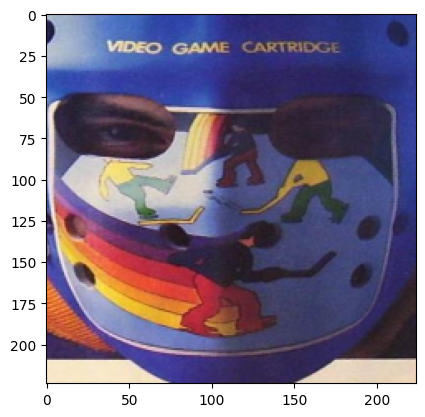

In [ ]:
check_photo('/content/data/train/masked_face/169152_58_Hockey_icehockey_puck_58_186.jpg')

1/1 [==============================] - 0s 20ms/step

Not covered face.
Prediction(0.005312079098075628)


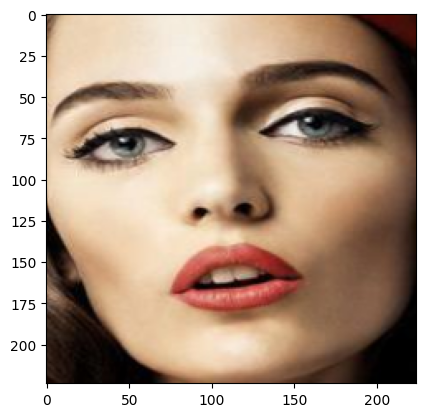

In [ ]:
check_photo('/content/data/train/face/100269_23_Shoppers_Shoppers_23_753.jpg')

# Applications - riot monitoring system

In [ ]:
new_model = tf.keras.models.load_model('/content/model.h5')

In [ ]:
def riot_monitoring(img_path):
  img_size = 224

  img_preview = cv2.imread(img_path)
  
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  gray = cv2.cvtColor(img_preview, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 1
  color = (0, 0, 255)
  thickness = 2

  for (x, y, w, h) in faces:
    org = (x+w, y)
    cv2.rectangle(img_preview, (x, y), (x+w, y+h), (0,255,0), 2)

    img = Image.open(img_path)
    cropped_img = img.crop((x, y, x+w, y+h))
    cropped_array = np.array(cropped_img)

    new_array = cv2.resize(cropped_array, (img_size, img_size))
    x_input = np.array(new_array).reshape(1, img_size, img_size, 3)
    x_input = x_input/255.0

    prediction = new_model.predict(x_input)
    print(prediction[0][0], '\n')


    if prediction[0][0] <= 0.5:
      cv2.putText(img_preview, 'FACE', org, font, fontScale, color, thickness, cv2.LINE_AA)
    else:
      cv2.putText(img_preview, 'MASK', org, font, fontScale, color, thickness, cv2.LINE_AA)

    plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))

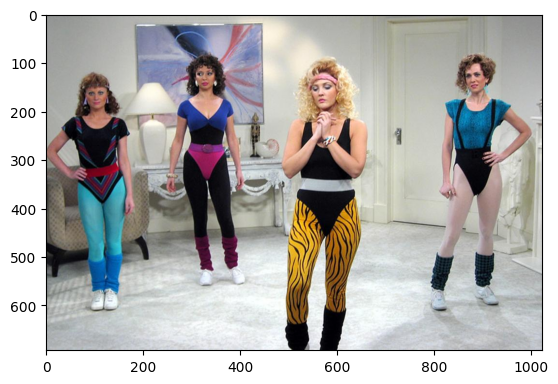

In [ ]:
img_path = '/content/resources/WIDER_train/images/44--Aerobics/44_Aerobics_Aerobics_44_528.jpg'
img_preview = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 22ms/step
0.010793626 

1/1 [==============================] - 0s 21ms/step
0.013770515 

1/1 [==============================] - 0s 20ms/step
0.041244112 

1/1 [==============================] - 0s 23ms/step
0.06863841 



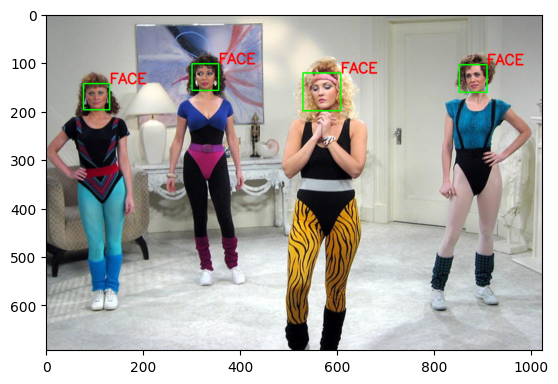

In [ ]:
riot_monitoring(img_path)

# Addons - probabilistic patterns

In [84]:
def generate_model(path):
    propabilistic_model: np.ndarray = np.zeros((224, 224), np.float64)
    pattern_count: int = 0
    for pattern_path in os.listdir(path):
        pattern: np.ndarray = cv2.imread(os.path.join(path, pattern_path), cv2.IMREAD_GRAYSCALE)
        pattern = cv2.resize(pattern, (224, 224)) / 255.
        propabilistic_model += pattern
        pattern_count += 1
    return (propabilistic_model / pattern_count).astype(np.float64)

In [85]:
face_patter = generate_model('/content/data/train/face')
face_patter_background = 1 - face_patter

masked_face_patter = generate_model('/content/data/train/masked_face')
masked_face_patter_background = 1-masked_face_patter

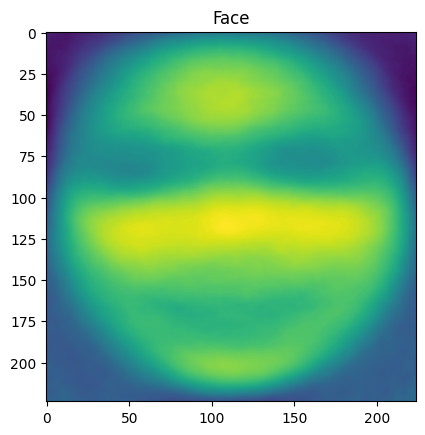

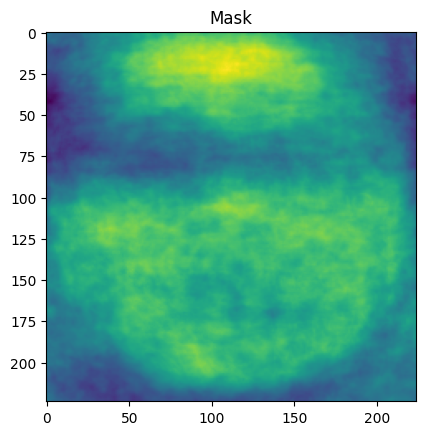

In [86]:
plt.imshow(face_patter)
plt.title("Face")
plt.show()

plt.imshow(masked_face_patter)
plt.title("Mask")
plt.show()

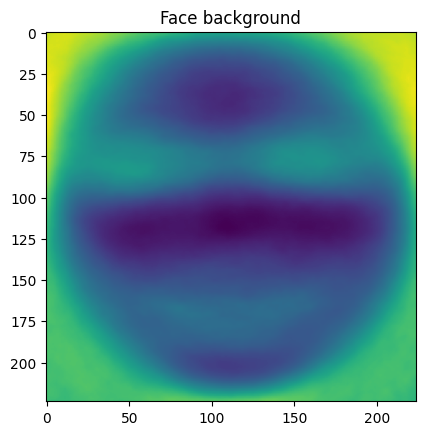

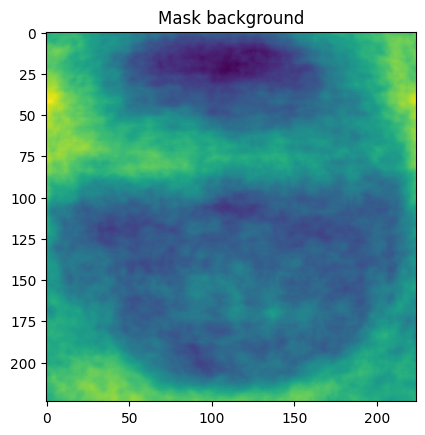

In [87]:
plt.imshow(face_patter_background)
plt.title("Face background")
plt.show()

plt.imshow(masked_face_patter_background)
plt.title("Mask background")
plt.show()